In [29]:
!pip install matplotlib

In [30]:
import torch
from PIL import Image
import numpy as np
import torch.nn as nn
from torchvision import transforms
from torchvision import transforms
import torch.nn.functional as F
from PIL import Image
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
#from pytorch_msssim import ms_ssim, ssim


import torch.nn as nn
import torch.optim as optim

In [31]:
Device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

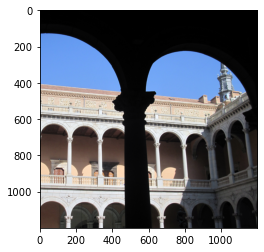

In [32]:
path='RGB_OR_1200x1200_00.png'
img=normalize_image(path).to(Device)
#img=img[:3,:576,:576]
disp_img=img*0.5+0.5
plt.imshow(disp_img.permute(1,2,0).to('cpu').numpy())
h,w=disp_img.shape[1],disp_img.shape[2]
plt.show()

In [36]:
dataset = CustomDataset(path)
#trainloader = DataLoader(dataset, batch_size= h*w, shuffle=Fals

In [38]:
coord_x,rgb_values_x=coord_x.to(Device),rgb_values_x.to(Device)

In [52]:
# Create the MLP model
input_size = 2  # x and y coordinates
hidden_size = 64
inhash_size = 300
output_size = 3  # RGB values
model=hsMLP(input_size, hidden_size, output_size)
model=model.to(Device)
# Define the loss function and optimizer
criterion1 = nn.L1Loss()
criterion=nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [53]:
lowest_loss=2
num_epochs = 10000
for epoch in range(num_epochs):
    epoch_loss=0
    count=0

    output = model(1)
    loss = criterion(output, rgb_values_x)

    epoch_loss+=loss.item()
    count+=1

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
      #print(loss.item())
    epoch_loss=epoch_loss/count
    """if epoch_loss<lowest_loss:
        lowest_loss=epoch_loss
        torch.save(model.state_dict(), 'model.pth')"""

    # Print the loss every 100 epochs
    #print(epoch)
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f},Lowest_loss: {lowest_loss:.4f}')
        disp_img_train(model)

KeyboardInterrupt: 

In [ ]:
!nvidia-smi

In [ ]:

torch.save(model.state_dict(), 'model.pth')

In [ ]:
disp_img_train(model)

In [ ]:
new_img=img*0.5+0.5
plt.imshow(new_img.permute(1,2,0).to('cpu').numpy())
plt.show()

In [ ]:
genr_image=model(1)
genr_image=genr_image.view(h,w,3)
genr_image=genr_image*0.5+0.5
print(f'PSNR: {PSNR(genr_image,img.permute(1,2,0))}')

In [ ]:

save(genr_image,"imagesiren_15_33.8.png")

In [ ]:
hash_im=imagefrom_hash(model.hash[:,0],h,w)
print(imagefrom_hash(model.hash[:,0],h,w).shape)

In [ ]:
x=model.hash[:,0].unsqueeze(1)
m,n,S=get_svd_and_num_eigenvectors_above_threshold(hash_im,0.1)

In [ ]:
with torch.no_grad():
  x=model.hash.data
  print(x.shape)
  m=m.view(x.shape,1)
  print(m.shape)
  model.hash.data=m
  disp_img_train(model)

In [ ]:
genr_image=model(1)
genr_image=genr_image.view(h,w,3)
genr_image=genr_image*0.5+0.5
print(f'PSNR,n: {PSNR(genr_image,img.permute(1,2,0))},{n}')

In [ ]:
x=torch.randn(1200,1200)
a,b=get_svd_and_num_eigenvectors_above_threshold(x,0.9)
b.sum(),a

In [ ]:
model.eval()
with torch.no_grad():
  genr_image=torch.zeros(h, w, 3).to(Device)
  hash=torch.matmul(model.hash01,model.hash02)
  h,w=hash.shape
  hash=hash.view(w*h,1)
  for x in range(h):
    for y in range(w):
      #genr_image[x,y,:]=model(torch.tensor([x,y],dtype=torch.float32),hash=False)
      #genr_image[x,y,:]=model(torch.cat((model.hash[w*x+y].unsqueeze(1),model.hash[w*x+y].unsqueeze(1)),dim=1),hash=False)
      #genr_image[x,y,:]=model(torch.tensor([x,y],dtype=torch.float32).to(Device))
      genr_image[x,y,:]=model(hash[w*x+y],hash=False)

  genr_image=genr_image*0.5+0.5
  plt.imshow(genr_image.detach().to('cpu').numpy())
  plt.show()